In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
import pandas as pd

file_path = '../excel/delosi_asistentes_tienda_dimensions.xlsx'
df = pd.read_excel(file_path)



In [18]:
df.head()

,organizationrefid,organizationname,projectrefid,projectcode,projectname,evaluationrefid,evaluationname,evaluationcode,evaluationstatus,evaluationopeningdate,...,answeredoptionsordinals,answerdate,uniqueid,datetimenow,questionunique,learninglevels,answer_type,answerscore,evaluatedparticipantrefid,evaluatorparticipantrefid
0,e85ca55d-083a-4847-be68-93d44a7284d0,Grupo Delosi,2c7c023e-d80e-4ff4-ae8e-0e53863466fe,PRJ_000371,Ejercicio Practico Asistente De Tienda,3ca3244b-dd13-4a6a-97b0-c07f14a9dbe2,Ejercicio Practico Asistente De Tienda,PRJ_000371,REOPENED,2025-04-09 20:05:44,...,2,2025-04-14 20:41:26,212,2025-05-28 19:37:55,DIM_002484QST_014830,1. Excelente,exito,100,ffd1de03-ff9c-426d-b46d-9b439497f30c,ffd1de03-ff9c-426d-b46d-9b439497f30c
1,e85ca55d-083a-4847-be68-93d44a7284d0,Grupo Delosi,2c7c023e-d80e-4ff4-ae8e-0e53863466fe,PRJ_000371,Ejercicio Practico Asistente De Tienda,3ca3244b-dd13-4a6a-97b0-c07f14a9dbe2,Ejercicio Practico Asistente De Tienda,PRJ_000371,REOPENED,2025-04-09 20:05:44,...,2,2025-04-14 21:20:31,234,2025-05-28 19:37:55,DIM_002484QST_014851,1. Excelente,exito,100,f84a691a-4290-4ed6-a708-dee8e2b8ba14,f84a691a-4290-4ed6-a708-dee8e2b8ba14
2,e85ca55d-083a-4847-be68-93d44a7284d0,Grupo Delosi,2c7c023e-d80e-4ff4-ae8e-0e53863466fe,PRJ_000371,Ejercicio Practico Asistente De Tienda,3ca3244b-dd13-4a6a-97b0-c07f14a9dbe2,Ejercicio Practico Asistente De Tienda,PRJ_000371,REOPENED,2025-04-09 20:05:44,...,2,2025-04-14 19:47:15,272,2025-05-28 19:37:55,DIM_002484QST_014829,1. Excelente,exito,100,f57e89e1-6dbc-4db6-a8f3-ef2a60261019,f57e89e1-6dbc-4db6-a8f3-ef2a60261019
3,e85ca55d-083a-4847-be68-93d44a7284d0,Grupo Delosi,2c7c023e-d80e-4ff4-ae8e-0e53863466fe,PRJ_000371,Ejercicio Practico Asistente De Tienda,3ca3244b-dd13-4a6a-97b0-c07f14a9dbe2,Ejercicio Practico Asistente De Tienda,PRJ_000371,REOPENED,2025-04-09 20:05:44,...,2,2025-04-14 20:46:40,416,2025-05-28 19:37:55,DIM_002484QST_014840,1. Excelente,exito,100,d27a09a6-2bc1-49b6-b01d-3d18ca55e03f,d27a09a6-2bc1-49b6-b01d-3d18ca55e03f
4,e85ca55d-083a-4847-be68-93d44a7284d0,Grupo Delosi,2c7c023e-d80e-4ff4-ae8e-0e53863466fe,PRJ_000371,Ejercicio Practico Asistente De Tienda,3ca3244b-dd13-4a6a-97b0-c07f14a9dbe2,Ejercicio Practico Asistente De Tienda,PRJ_000371,REOPENED,2025-04-09 20:05:44,...,2,2025-04-14 19:49:59,470,2025-05-28 19:37:55,DIM_002484QST_014830,1. Excelente,exito,100,cc2f77fb-55da-4736-bbf6-494d4ef41391,cc2f77fb-55da-4736-bbf6-494d4ef41391


In [19]:
# metrica caso practico
caso_practico = df['answerscore'][df.dimensionparentname=="Caso Práctico"].mean()
conocimiento = df['answerscore'][df.dimensionparentname=="Conocimiento"].mean()
ponderado = 0.7*caso_practico + 0.3*conocimiento
ponderado

np.float64(66.6248866193686)

C:\Users\Sebas\AppData\Local\Temp\ipykernel_20684\2296383697.py:52: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


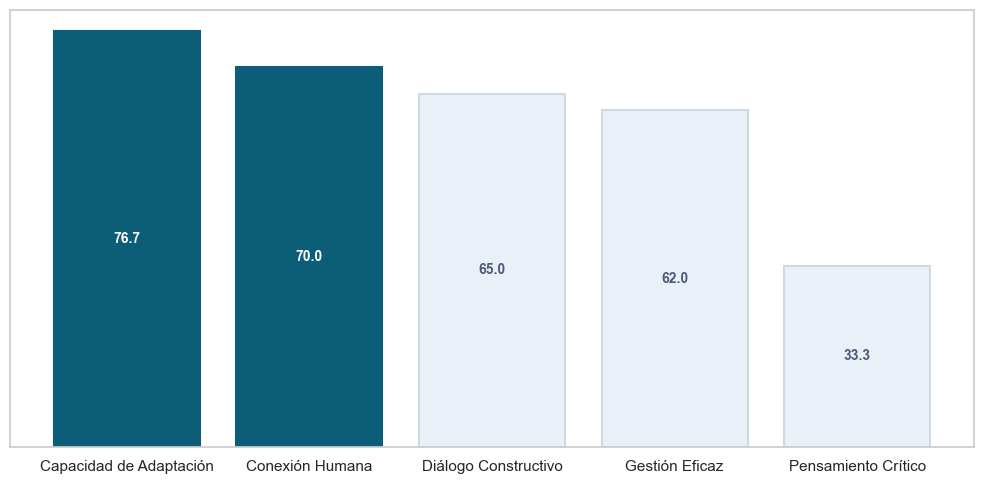

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Definir función basada en plot_ponderado, pero adaptada al estilo del gráfico de columnas verticales
def plot_por_questionblock(df, usuario):
    """
    df: DataFrame con columnas ['questionblockname', 'dimensionparentname', 'answerscore', 'evaluatedemployeedisplayname']
    usuario: nombre exacto del usuario a graficar
    """
    df_usuario = df[df['evaluatedemployeedisplayname'] == usuario]
    questionblocks = df_usuario['questionblockname'].unique()

    resultados = []
    for bloque in questionblocks:
        sub_df = df_usuario[df_usuario['questionblockname'] == bloque]
        caso_practico = sub_df['answerscore'][sub_df['dimensionparentname'] == "Caso Práctico"].mean()
        conocimiento = sub_df['answerscore'][sub_df['dimensionparentname'] == "Conocimiento"].mean()
        ponderado = 0.7 * caso_practico + 0.3 * conocimiento
        resultados.append({'questionblockname': bloque, 'Puntuación ponderada': ponderado})

    result_df = pd.DataFrame(resultados).sort_values('Puntuación ponderada', ascending=False)

    colores = ['#0b5d78' if x >= 70 else '#e9f0f7' for x in result_df['Puntuación ponderada']]
    textos = ['white' if x >= 70 else '#4e5b7c' for x in result_df['Puntuación ponderada']]
    bordes = ['#0b5d78' if x >= 70 else '#d0d8e4' for x in result_df['Puntuación ponderada']]

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.grid(False)

    bars = ax.bar(result_df['questionblockname'], result_df['Puntuación ponderada'],
                  color=colores, edgecolor=bordes, linewidth=1.5)

    for bar, texto, val in zip(bars, textos, result_df['Puntuación ponderada']):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height/2, f'{val:.1f}',
                ha='center', va='center', fontsize=10, color=texto, weight='bold')

    # Ocultar títulos y ticks
    # ax.set_xlabel('')
    # ax.set_ylabel('Puntuación ponderada')
    ax.tick_params(axis='y', left=False, labelleft=False)

    plt.xticks(rotation=0, ha='center')
    # ax.set_title(f'Puntaje ponderado por competencia - {usuario}', fontsize=12)
    plt.tight_layout()
    return fig

# Ejecutar si df ya está en memoria
try:
    fig = plot_por_questionblock(df, "Abarca Lozano Johan Ricardo")
    fig.show()
except Exception as e:
    print(str(e))


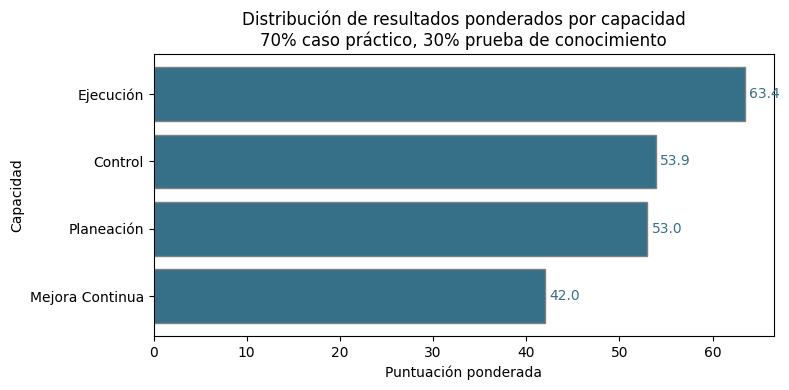

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_ponderado(df):
    """
    df: DataFrame con columnas ['dimensionchildname', 'dimensionparentname', 'answerscore']
    """
    resultados = []
    for child in df['dimensionchildname'].unique():
        sub_df = df[df['dimensionchildname'] == child]
        caso_practico = sub_df['answerscore'][sub_df['dimensionparentname'] == "Caso Práctico"].mean()
        conocimiento = sub_df['answerscore'][sub_df['dimensionparentname'] == "Conocimiento"].mean()
        ponderado = 0.7 * caso_practico + 0.3 * conocimiento
        resultados.append({'dimensionchildname': child, 'Puntuación ponderada': ponderado})

    result_df = pd.DataFrame(resultados).sort_values('Puntuación ponderada', ascending=False)

    fig, ax = plt.subplots(figsize=(8, 4))
    bars = ax.barh(result_df['dimensionchildname'], result_df['Puntuación ponderada'], color='#357088', edgecolor='gray')

    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.5, bar.get_y() + bar.get_height()/2,
                f'{width:.1f}', va='center', fontsize=10, color='#357088')

    ax.set_xlabel('Puntuación ponderada')
    ax.set_ylabel('Capacidad')
    ax.invert_yaxis()
    ax.set_title('Distribución de resultados ponderados por capacidad\n70% caso práctico, 30% prueba de conocimiento')
    plt.tight_layout()
    plt.show()

plot_ponderado(df[df.evaluatedemployeedisplayname == "Abarca Lozano Johan Ricardo"])

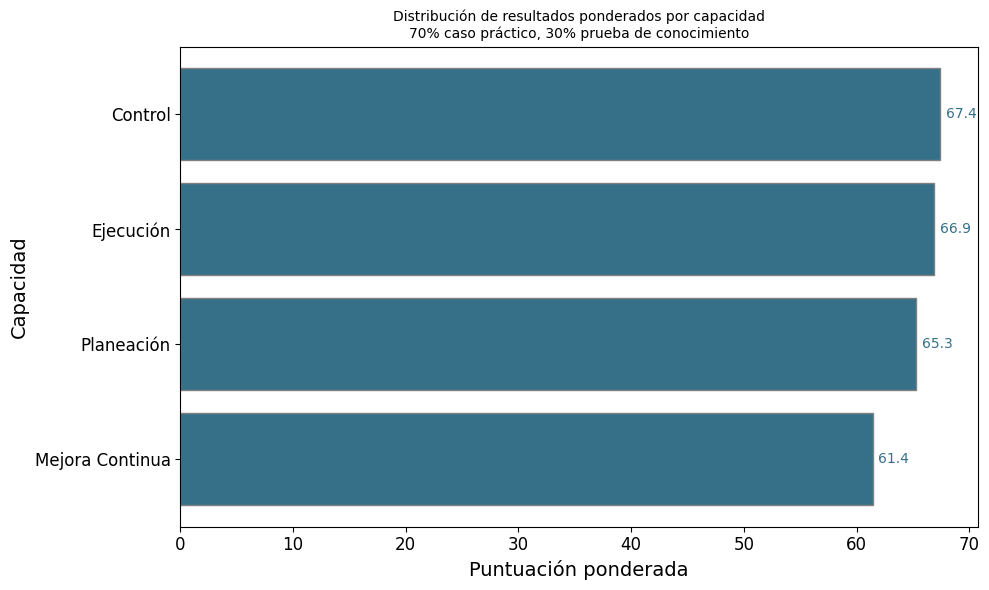

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

class PuntuacionPonderada:
    def __init__(self, df):
        self.df = df

    def calcular_ponderado(self):
        # Calcular las puntuaciones ponderadas
        self.ponderado_df = self.df.pivot_table(index='dimensionchildname', 
                                                columns='dimensionparentname', 
                                                values='answerscore', 
                                                aggfunc='mean')
        self.ponderado_df['Puntuación ponderada'] = 0.7 * self.ponderado_df['Caso Práctico'] + 0.3 * self.ponderado_df['Conocimiento']
        self.ponderado_df = self.ponderado_df.sort_values('Puntuación ponderada', ascending=False).reset_index()

    def grafico_barras(self):
        # Crear el gráfico
        fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')
        bars = ax.barh(self.ponderado_df['dimensionchildname'], self.ponderado_df['Puntuación ponderada'], color='#357088', edgecolor='gray')

        # Añadir etiquetas a las barras
        for bar in bars:
            width = bar.get_width()
            ax.text(width + 0.5, bar.get_y() + bar.get_height()/2,
                    f'{width:.1f}', va='center', fontsize=10, color='#357088')

        # Configurar etiquetas y título del gráfico
        ax.set_xlabel('Puntuación ponderada', fontsize=14)
        ax.set_ylabel('Capacidad', fontsize=14)
        ax.invert_yaxis()
        ax.set_title('Distribución de resultados ponderados por capacidad\n70% caso práctico, 30% prueba de conocimiento', fontsize=10)
        ax.tick_params(axis='both', which='major', labelsize=12)
        plt.tight_layout()
        plt.show()

pp = PuntuacionPonderada(df)
pp.calcular_ponderado()
pp.grafico_barras()
